### Import the required libraries

In [3]:
import numpy as np
import pandas as pd #data processing
import matplotlib.pyplot as plt #visualization
import seaborn as sns #visualization
import missingno as msno #missing data visualization
from collections import Counter #counting 
from sklearn.preprocessing import LabelEncoder

In [4]:
#Import data 
customers = pd.read_csv("Customer-Churn - Customer-Churn.csv")

In [5]:
customers.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Examine Columns

In [6]:
customers.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


In [7]:
print("Shape of the dataset:", customers.shape)

# Print the info of the dataset
print("\nInfo of the dataset:")
customers.info()

# Print the columns of the dataset
print("\nColumns in the dataset:", customers.columns)

Shape of the dataset: (7043, 21)

Info of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   

### Data cleaning

In [8]:
#Remove irrelevant variables, customeriD
customers = customers.drop(labels = "customerID", axis = 1)

customers

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [9]:
#drop duplicates 
customers = customers.drop_duplicates(keep = "first", ignore_index = True)

customers

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7016,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7017,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7018,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7019,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [10]:
#Check for missing values
customers.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
#calculate median of total_charges
total_charges_median = customers["TotalCharges"].median()
total_charges_median

1403.875

In [12]:
#check for null values again
customers.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [13]:
#describe numerical variables
customers.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7021.0,0.162512,0.368947,0.00,0.0000,0.000,0.0000,1.00
tenure,7021.0,32.469449,24.534965,0.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7021.0,64.851894,30.069001,18.25,35.7500,70.400,89.9000,118.75
TotalCharges,7010.0,2290.353388,2266.820832,18.80,408.3125,1403.875,3807.8375,8684.80


In [14]:
#create a dataframe of categorical variables
categorical_df = customers.select_dtypes(include = "object")
categorical_df.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


### Univariate Analysis

In [15]:
#Create a dataframe of Numerical variables 
numerical_df = customers.select_dtypes(exclude = "object")
numerical_df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7016,0,24,84.80,1990.50
7017,0,72,103.20,7362.90
7018,0,11,29.60,346.45
7019,1,4,74.40,306.60


In [16]:
#convert numerical dataframe to list
numerical_cols = numerical_df.columns.to_list()

numerical_cols

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

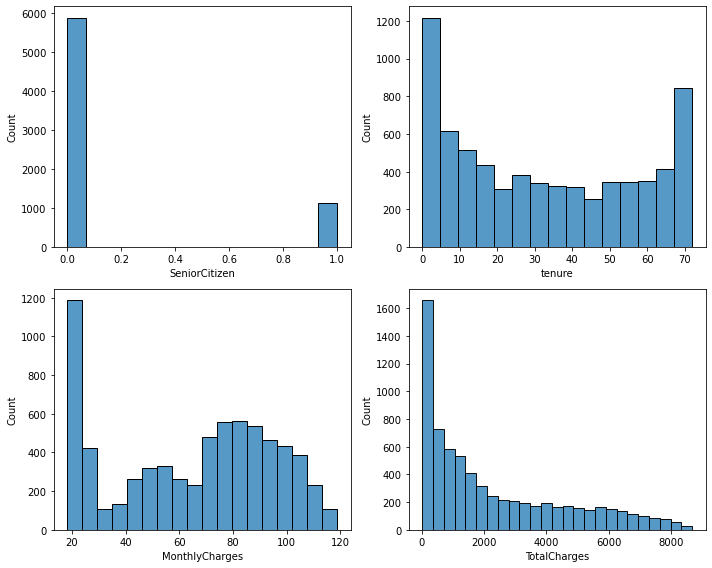

In [17]:
#Check the distribution of each column
fig, axes = plt.subplots(nrows= 2, ncols=2, figsize = (10,8))

position = axes.flatten()


for index, col_name in enumerate(numerical_cols):
    sns.histplot(data = numerical_df[col_name], ax = position[index])
    
plt.tight_layout()

plt.savefig('visualization1.pdf', format='pdf')


In [18]:
#narration

#Tenure
"""
Customer Tenure
The histogram indicates that over 1,600 customers have been with the brand for 0-5 months, 
whereas only around 800 customers have maintained their relationship with 
the brand for 5 years.

Monthly Charges
The most frequent monthly charge incurred by customers is $20, with fewer
customers paying above $80 each month.

Total Charges
As anticipated, the most common total charge falls between $0 and $400, 
with only a small number of customers paying over $2,000

"""

'\nCustomer Tenure\nThe histogram indicates that over 1,600 customers have been with the brand for 0-5 months, \nwhereas only around 800 customers have maintained their relationship with \nthe brand for 5 years.\n\nMonthly Charges\nThe most frequent monthly charge incurred by customers is $20, with fewer\ncustomers paying above $80 each month.\n\nTotal Charges\nAs anticipated, the most common total charge falls between $0 and $400, \nwith only a small number of customers paying over $2,000\n\n'

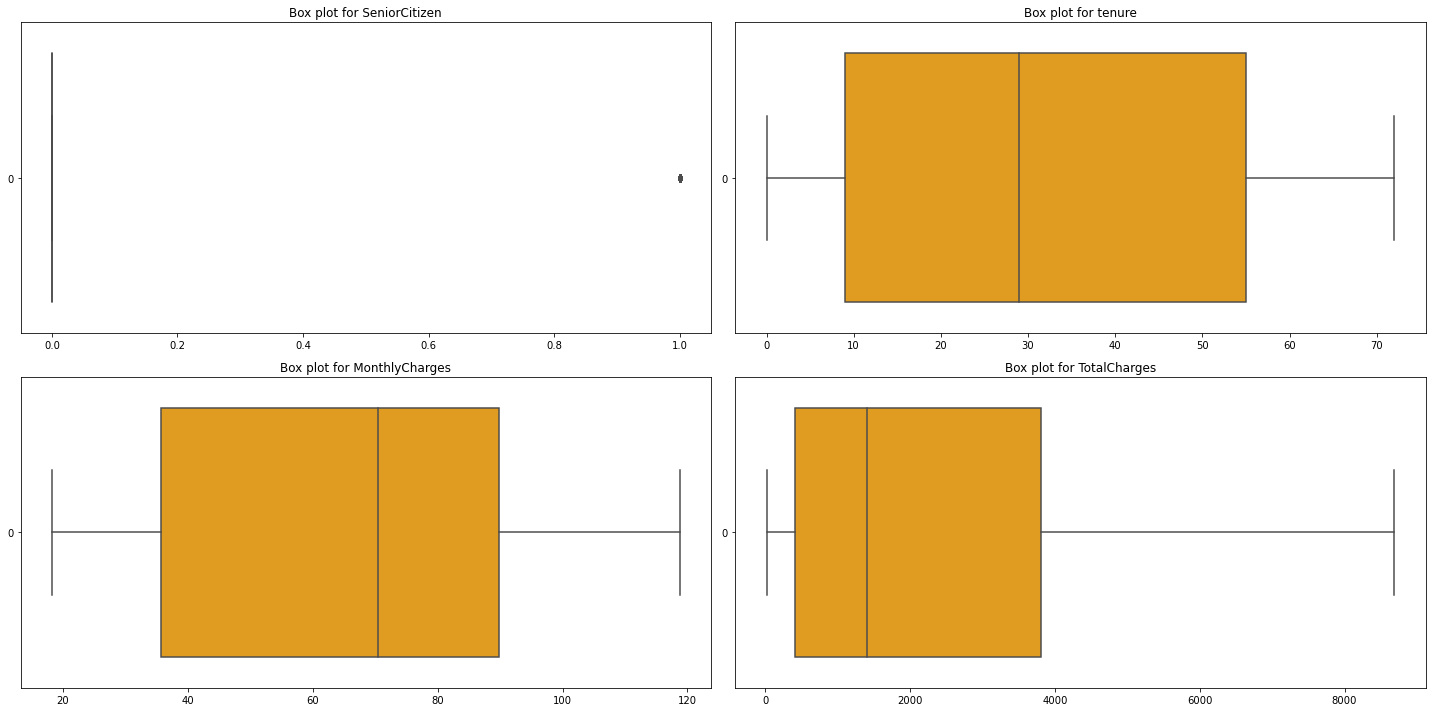

In [19]:
#create a box plot for all numerical variables 
n_features = len(numerical_cols)
num_cols = 2
num_rows = (n_features + 1)//num_cols

fig, axes = plt.subplots(ncols = 2, nrows = 2, figsize = (20,10))

position  = axes.flatten()

for index, feature in enumerate(numerical_cols):
    sns.boxplot(data = customers[feature], ax = position[index], orient = "h", color = "orange")
    position[index].set_title(f"Box plot for {feature}")
    
plt.tight_layout()

plt.savefig('visualization2.pdf', format='pdf')

In [20]:
#Narration

"""The box plot confirms the observations seen in the histogram

Tenure
The median customer tenure is 29 months (approximately 2.4 years), with a slight 
majority of customers having a tenure longer than this value.

Monthly Charges
The median monthly charge is around $70, with a higher number of customers paying 
less than this amount, suggesting a left-skewed distribution.

Total Charges
The median total charge is approximately $1,500, with a greater 
number of customers having total charges above the median, indicating a right-skewed distribution.

"""

'The box plot confirms the observations seen in the histogram\n\nTenure\nThe median customer tenure is 29 months (approximately 2.4 years), with a slight \nmajority of customers having a tenure longer than this value.\n\nMonthly Charges\nThe median monthly charge is around $70, with a higher number of customers paying \nless than this amount, suggesting a left-skewed distribution.\n\nTotal Charges\nThe median total charge is approximately $1,500, with a greater \nnumber of customers having total charges above the median, indicating a right-skewed distribution.\n\n'

In [21]:
#Univariate analysis for categorical columns 
categorical_df

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7016,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7017,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7018,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7019,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


In [23]:
# for loop to see unique values in each column

for feature in categorical_df:
    print(feature)
    print (categorical_df[feature].unique())
    print ("\n")

gender
['Female' 'Male']


Partner
['Yes' 'No']


Dependents
['No' 'Yes']


PhoneService
['No' 'Yes']


MultipleLines
['No phone service' 'No' 'Yes']


InternetService
['DSL' 'Fiber optic' 'No']


OnlineSecurity
['No' 'Yes' 'No internet service']


OnlineBackup
['Yes' 'No' 'No internet service']


DeviceProtection
['No' 'Yes' 'No internet service']


TechSupport
['No' 'Yes' 'No internet service']


StreamingTV
['No' 'Yes' 'No internet service']


StreamingMovies
['No' 'Yes' 'No internet service']


Contract
['Month-to-month' 'One year' 'Two year']


PaperlessBilling
['Yes' 'No']


PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


Churn
['No' 'Yes']




In [25]:
#rename lengthy column categories for clear visualization

categorical_df["PaymentMethod"]= categorical_df["PaymentMethod"].replace("Bank transfer (automatic)", 
                                                              "Bank transfer") 

categorical_df["PaymentMethod"]= categorical_df["PaymentMethod"].replace("Credit card (automatic)", 
                                                              "Credit card")

In [26]:
categorical_df["PaymentMethod"].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'],
      dtype=object)

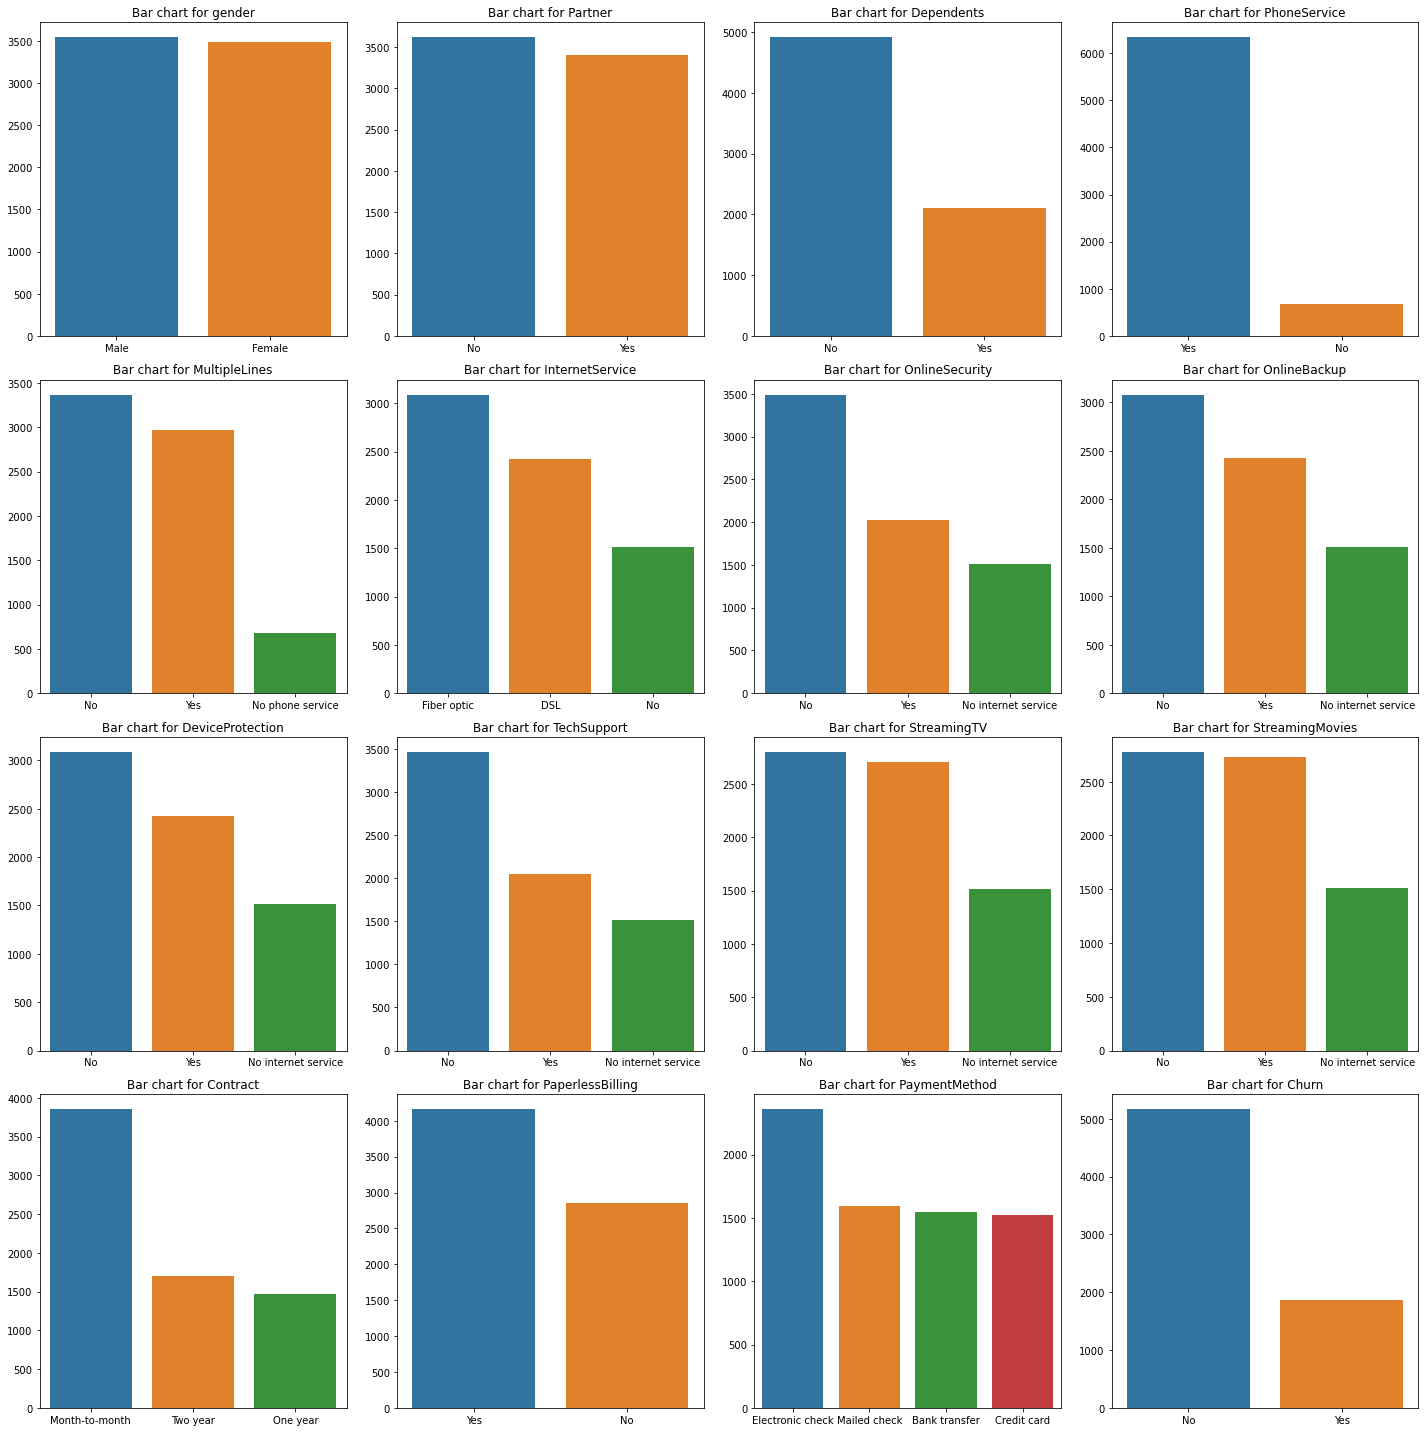

In [27]:
#visualize the categories for each column using bar charts

fig, axes = plt.subplots(nrows=4, ncols=4, figsize = (20,20))

position = axes.flatten()

for index, feature in enumerate(categorical_df):
    sns.barplot(x = categorical_df[feature].value_counts().index, 
                y =categorical_df[feature].value_counts().values, 
               ax = position[index])
    position[index].set_title(f"Bar chart for {feature}")
    
plt.tight_layout()

plt.savefig('visualization3.pdf', format='pdf')

### Bivariate Analysis

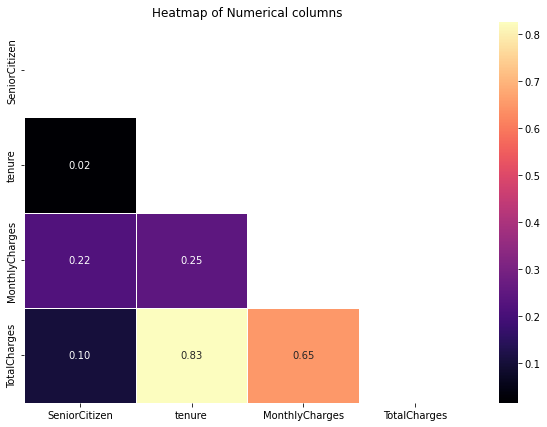

In [28]:
#Correlation of numerical variables
numerical_df.corr()

#heatmap of numerical columns 

plt.figure(figsize = (10,7))

my_mask = np.triu(np.ones_like(numerical_df.corr(), dtype = bool))

sns.heatmap(data = numerical_df.corr(),annot=True, cmap= "magma", fmt = ".2f", mask = my_mask, linewidths=0.5)
plt.title("Heatmap of Numerical columns")


plt.savefig('visualization4.pdf', format='pdf')
plt.show()

In [ ]:
#Narration 
"""
Tenure and Total Charges
There appears to be a strong positive association between tenure and total charges, 
indicating that older customers have high charges

Churn and other Features 
Senior citizen and monthly charges have a weak positive association 
with customer churn. 
Tenure and total charges have a weak negative correlation with churn"""

### Bivariate analysis for Categorical columns 

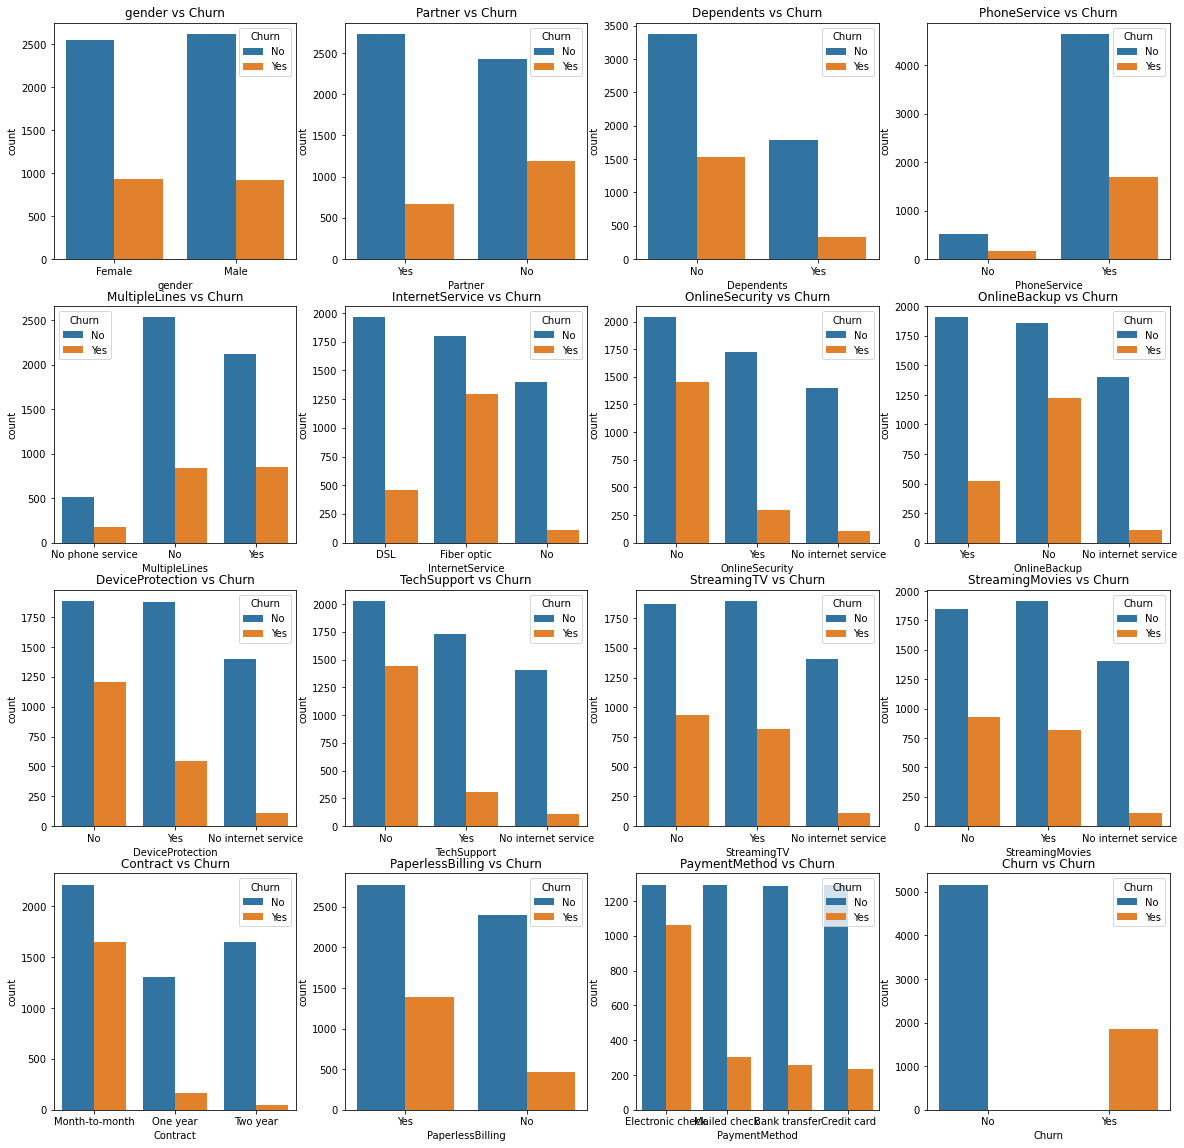

In [30]:
#Visualize the relationship between customer churn and each feature 

fig, axes = plt.subplots(nrows=4, ncols=4, figsize = (20,20))

position = axes.flatten()

for index, feature in enumerate(categorical_df):
    sns.countplot(data = categorical_df, x =feature, hue = customers["Churn"], ax = position[index])
    position[index].set_title(f"{feature} vs Churn")

plt.savefig('visualization5.pdf', format='pdf')
plt.show()  


In [ ]:
Narration

''' Churn rates are high for the following group of customers:
- Customers with a phone service plan
- Customers with multiple lines
- Customers with Fibre optic internet service 
- Customers on a month-to-month contract
- Customers that make payments using electronic checks
- Customers that opt for paperless billing 
The company should administer surveys to these customers to uncover the specific reason
for their discontinued brand patronage

Interestingly, I also noticed that higher churn rates for:
- Customers with no partners (singles)
- Customers without dependents 
This may signal that internet, streaming and mobile servies may not be a 
priority for individuals living alone. This should be investigated further however.

The chart above also shows that churn rates are high for customers without:
- online security
- online backup
- device protection
- tech support 
- movie streaming 
- tv streaming plans.
These group of customers may not necessarily value these additional telecomms 
servies provided by the company.

'''

### Machine Learning Pre-processing: Encode all categorical variables

In [31]:
#Import package and initialize Encoder
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

In [32]:
#Use a for loop to transform categorical variables and save them in the categorical 
#dataframe 
for column in customers:
    categorical_df[column] = encoder.fit_transform(customers[column])

In [33]:
categorical_df.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0,0,1,142,74
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0,0,34,498,3624
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1,0,2,436,536
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0,0,45,266,3570
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1,0,2,729,674


In [34]:
#Select labels and features 

label = categorical_df["Churn"]
features = categorical_df.drop(["Churn"], axis=1)

In [35]:
label.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [36]:
features.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0,1,142,74
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0,34,498,3624
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,0,2,436,536
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0,45,266,3570
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,0,2,729,674


In [ ]:
#confirm if length of features equals length of label
len(label) == len(features)

### Data splitting : Split into training and test sets 

In [37]:
print(f"This data contains {len(features)} records before spliting")

This data contains 7021 records before spliting


In [38]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features, label, test_size = 0.2,
                                                   random_state = 42)

In [39]:
x_train.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
3269,0,0,0,1,0,1,0,0,0,0,0,2,0,1,2,0,4,883,1183
6252,1,0,0,1,2,1,0,2,2,0,0,0,0,1,1,1,33,972,4189
1323,0,1,1,1,0,2,1,1,1,1,1,1,0,0,3,0,4,36,361
5190,1,0,0,1,0,2,1,1,1,1,1,1,1,1,2,0,9,27,730
4071,0,1,1,1,2,2,1,1,1,1,1,1,2,0,3,0,29,114,1961


In [40]:
y_train.head()

3269    1
6252    1
1323    1
5190    0
4071    0
Name: Churn, dtype: int64

In [41]:
type(y_train)

pandas.core.series.Series

In [42]:
#check if x_train and x_test = features
len(x_train) + len(x_test) == len(features)

True

### Data Scaling 

In [43]:
#Import and initialize scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [44]:
#Scale training data
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

### Use different models for prediction

In [45]:
!pip install xgboost

In [46]:
#Import packages 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix


In [47]:
#Create a list that stores the different classifiers
classifiers = [[LogisticRegression(random_state=42), 'Logistic Regression'],
               [SGDClassifier(random_state=42), 'SGD Classifiers'],
               [DecisionTreeClassifier(random_state=42), 'Decision Tree'],
               [RandomForestClassifier(random_state=42), 'Random Forest'],
               [XGBClassifier(random_state=42), 'XGB Classifier'],
               [SVC(random_state=42), 'SVC']
               ]

<-- Logistic Regression -->
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1053
           1       0.61      0.49      0.54       352

    accuracy                           0.79      1405
   macro avg       0.73      0.69      0.71      1405
weighted avg       0.78      0.79      0.79      1405



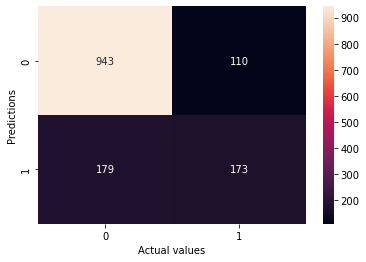

<-- SGD Classifiers -->
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.97      0.87      1053
           1       0.71      0.25      0.37       352

    accuracy                           0.79      1405
   macro avg       0.75      0.61      0.62      1405
weighted avg       0.77      0.79      0.74      1405



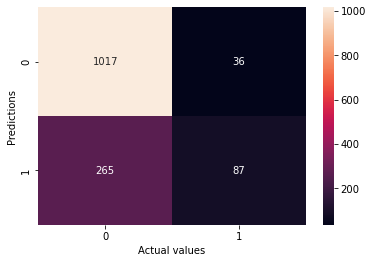

<-- Decision Tree -->
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.81      0.82      1053
           1       0.47      0.50      0.48       352

    accuracy                           0.73      1405
   macro avg       0.65      0.66      0.65      1405
weighted avg       0.74      0.73      0.74      1405



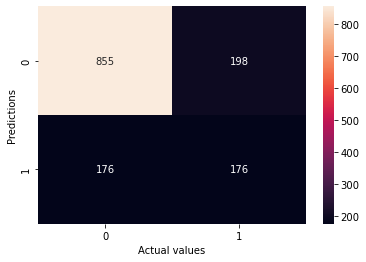

<-- Random Forest -->
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1053
           1       0.60      0.47      0.52       352

    accuracy                           0.79      1405
   macro avg       0.72      0.68      0.69      1405
weighted avg       0.77      0.79      0.78      1405



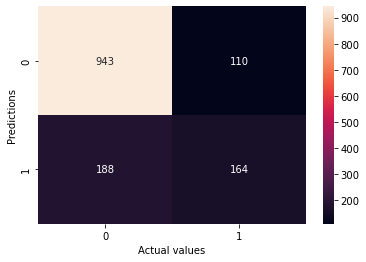

<-- XGB Classifier -->
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86      1053
           1       0.57      0.48      0.52       352

    accuracy                           0.78      1405
   macro avg       0.70      0.68      0.69      1405
weighted avg       0.77      0.78      0.77      1405



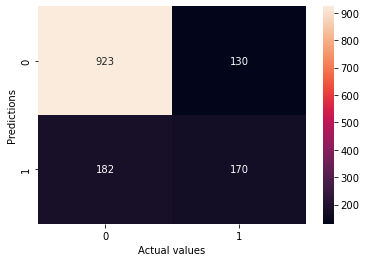

<-- SVC -->
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86      1053
           1       0.60      0.42      0.49       352

    accuracy                           0.79      1405
   macro avg       0.71      0.66      0.68      1405
weighted avg       0.77      0.79      0.77      1405



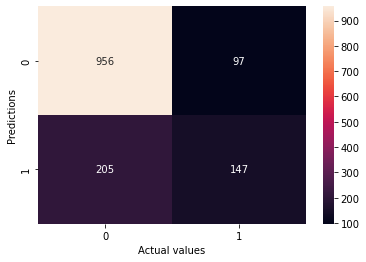

In [48]:
#Create a for loop to fit the data, make predictions and evaluate the results for each model

for classifier in classifiers:
    print(f"<-- {classifier[1]} -->")
    model_name = classifier[1]
    model = classifier[0]
    model.fit(x_train_scaled, y_train)
    predictions = model.predict(x_test_scaled)
    report = classification_report(y_test, predictions)
    matrix = confusion_matrix(y_test, predictions)
    print("Classification Report:\n", report)
    sns.heatmap(matrix, annot=True, fmt='g')
    plt.xlabel("Actual values")
    plt.ylabel("Predictions")
    plt.show()
    


In [ ]:
### Project aim
"""As stated in the project brief, the aim of this project is to accurately forecast
customer churn. To do this, we should focus on reducing the number of false negatives
that is the, negative incorrect predictions for Class 1(Customers who churn).

- A false prediction for a customer who is about to churn can make the company
lose the opportunity to take proactive measures to retain them. 
This could result in lost revenue and customers.

However, We should equally aim to have a decent number of true positives
(correct predictions for the positive class).


In [ ]:
#Interpreting Evaluation results to determine the best model


"""

- Decision Tree and XGB Classifiers should be eliminated first due to their high number 
of false negatives.

- Random Forest and Logistic Regression have an equal number of false negatives, 
but Logistic Regression outperforms with a higher number of true predictions, 
making Random Forest less favorable.

- SGD and SVC have the lowest false negatives but suffer from a high number of false 
positives (misclassifying non-churners as churners) and lower true positive predictions, 
so they can be ruled out.

- Logistic Regression emerges as the best option with the highest F1-score of 0.54.


"""



### Visualize f1-scores for all models

In [49]:
#Create a list that stores evaluation metrics for visualization
from sklearn.metrics import precision_score, recall_score, f1_score

recall_list = {}
precision_list = {}
f1_score_list = {}

for classifier in classifiers:
    model = classifier[0]
    model.fit(x_train_scaled, y_train)
    predictions = model.predict(x_test_scaled)
    model_name = classifier[1]
    
    # Calculate precision, recall, and F1 scores
    p_score = precision_score(y_test, predictions)
    r_score = recall_score(y_test, predictions)
    f_score = f1_score(y_test, predictions)
    
    # Store the results in the dictionaries
    recall_list[model_name] = str(round(r_score * 100, 2)) + '%'
    precision_list[model_name] = str(round(p_score * 100, 2)) + '%'
    f1_score_list[model_name] = str(round(f_score * 100, 2)) + '%'
    
    if model_name != classifiers[-1][1]:
        print('')
    

In [51]:
#convert f1_score list to dataframe to visualize 
f1_df = pd.DataFrame(list(f1_score_list.items()), 
                             columns=['Classifier', 'F1 Score (%)'])

# Convert the F1 Score column to numeric datatype by removing the '%' sign
f1_df['F1 Score (%)'] = f1_df['F1 Score (%)'].str.rstrip('%').astype('float')

#sort values
f1_df = f1_df.sort_values(by='F1 Score (%)', ascending=True)

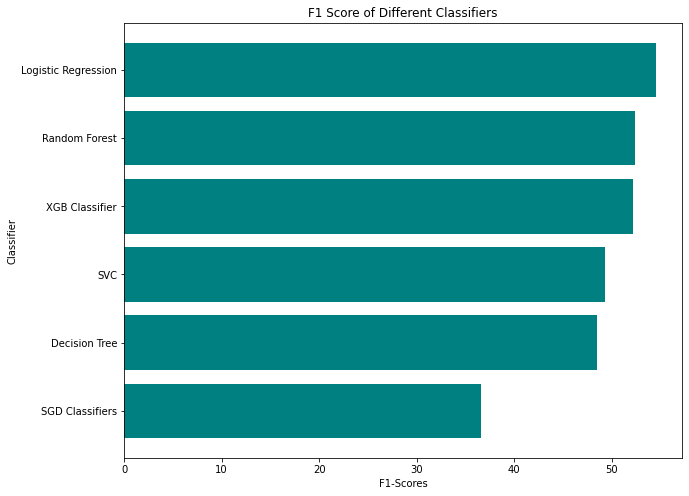

In [56]:
# Plotting the bar chart
plt.figure(figsize=(10, 8))
plt.barh(f1_df['Classifier'], f1_df['F1 Score (%)'], color='teal')
plt.xlabel('F1-Scores')
plt.ylabel('Classifier')
plt.title('F1 Score of Different Classifiers')




plt.show()


In [ ]:
"""The vertical bar chart shows that the f1-score is highest for Logistic Regression
indicating that this model does the best job in predicting Customers who churn"""

### Interpretation of Logistic Regression Confusion Matrix

<-- Logistic Regression -->
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1053
           1       0.61      0.49      0.54       352

    accuracy                           0.79      1405
   macro avg       0.73      0.69      0.71      1405
weighted avg       0.78      0.79      0.79      1405

Confusion Matrix:
 [[943 110]
 [179 173]]


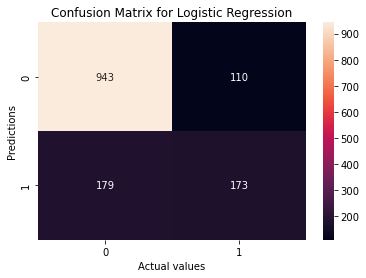

In [59]:
for classifier in classifiers:
    model_name = classifier[1]
    model = classifier[0]
    
    # Train the model
    model.fit(x_train_scaled, y_train)
    
    # Make predictions
    predictions = model.predict(x_test_scaled)
    
    # Print classification report and confusion matrix only for Logistic Regression
    if model_name == 'Logistic Regression':
        report = classification_report(y_test, predictions)
        print(f"<-- {model_name} -->")
        print("Classification Report:\n", report)
        
        # Compute and print confusion matrix
        matrix = confusion_matrix(y_test, predictions)
        print("Confusion Matrix:\n", matrix)
        
        # Plot confusion matrix
        sns.heatmap(matrix, annot=True, fmt='g')
        plt.xlabel("Actual values")
        plt.ylabel("Predictions")
        plt.title(f"Confusion Matrix for {model_name}")
        
        
        # Save the plot as a PDF
        plt.savefig('confusion_matrix_logistic_regression.pdf', format='pdf', bbox_inches='tight')
        
        # Show the plot
        plt.show()


In [ ]:
"""
The report above clearly shows that our model is better at predicting instances of no customer
Churn compared to Churn - which is our focus. 

Out of 352 instances of customer churn, only 173 (49%) are correctly predicted.
The model fails to identify people who stopped patronizing the business 110 times.

To achieve the goal of reducing customer attrition, the focus should on reducing the incorrect
prediction for customer churn (false negatives)and increasing the number of correct predictions 
(true positives) for customer churn 


"""

In [ ]:
"""Exploring the Churn variable reveals an obvious class imbalance, we have more 
cases of customer retention compared to customer churn. 
This explains why the model is better identifying to retained customers to thise
to churn """



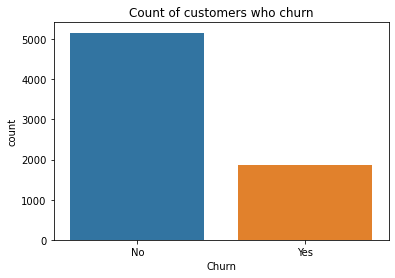

In [61]:
sns.countplot(x="Churn", data=customers)
plt.title("Count of customers who churn")

plt.savefig('visualization8.pdf', format='pdf')
plt.show()

### Feature Importance - Obtain the most important features for the Logistic Regression model using the coefficients 

In [62]:
lm_model = LogisticRegression()
    
# Train the model
lm_model.fit(x_train_scaled, y_train)
    

LogisticRegression()

In [63]:
#convert this array to a dataframe called feature importance
features.columns
feature_name = features.columns

In [64]:
coefficients = lm_model.coef_[0]
coefficients

array([-0.0116615 ,  0.06699151, -0.21370171, -0.80562457,  0.24828643,
        0.07789889, -0.54800421, -0.28959906, -0.1373898 , -0.56714317,
        0.05029508,  0.10988558, -1.50715164,  0.29363068,  0.12078495,
        0.28959432,  0.18690562,  3.66307619, -3.36191185])

In [70]:
#store the coefficients and their corresponding feature names in a dataframe
feature_importance = pd.DataFrame({"Feature" :feature_name, "Importance" : coefficients})

#sort in descending order
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

feature_importance

,Feature,Importance
17,MonthlyCharges,3.663076
13,PaperlessBilling,0.293631
15,SeniorCitizen,0.289594
4,MultipleLines,0.248286
16,tenure,0.186906
14,PaymentMethod,0.120785
11,StreamingMovies,0.109886
5,InternetService,0.077899
1,Partner,0.066992
10,StreamingTV,0.050295


In [80]:
#Create a variable to store the absolute values of the coefficients to determine importance
feature_importance_abs = pd.DataFrame({"Feature" :feature_name, "Importance" : np.abs(coefficients)})

#sort in descending order
feature_importance_abs = feature_importance_abs.sort_values(by='Importance', ascending=False)

In [81]:
feature_importance_abs

,Feature,Importance
17,MonthlyCharges,3.663076
18,TotalCharges,3.361912
12,Contract,1.507152
3,PhoneService,0.805625
9,TechSupport,0.567143
6,OnlineSecurity,0.548004
13,PaperlessBilling,0.293631
7,OnlineBackup,0.289599
15,SeniorCitizen,0.289594
4,MultipleLines,0.248286


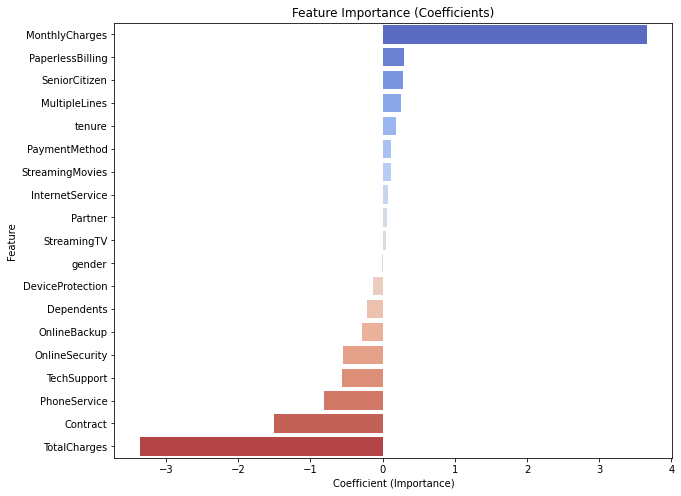

In [85]:
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='coolwarm')

# Add labels and title
plt.xlabel('Coefficient (Importance)')
plt.ylabel('Feature')
plt.title('Feature Importance (Coefficients)')

plt.savefig('visualization9.pdf', format='pdf')
plt.show()

In [86]:
#another feature selection technique, Recursive Feature Elimination to verfiy our results

from sklearn.feature_selection import RFE

base_estimator = LogisticRegression()
rfe = RFE(estimator=base_estimator, n_features_to_select=7, verbose=1)
rfe.fit(x_train_scaled, y_train)

x_train_selected = rfe.transform(x_train_scaled)
x_test_selected = rfe.transform(x_test_scaled)

selected_features = features.columns[rfe.get_support()]
print(f"Selected features: {', '.join(selected_features)}")

Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Selected features: PhoneService, OnlineSecurity, TechSupport, Contract, SeniorCitizen, MonthlyCharges, TotalCharges


### Select top 7 features

In [87]:
top_eight_features = feature_importance_abs[:8]
top_eight_features

,Feature,Importance
17,MonthlyCharges,3.663076
18,TotalCharges,3.361912
12,Contract,1.507152
3,PhoneService,0.805625
9,TechSupport,0.567143
6,OnlineSecurity,0.548004
13,PaperlessBilling,0.293631
7,OnlineBackup,0.289599


In [88]:
#save the top seven features training and test data in new variables

x_train_top_eight = x_train[top_eight_features["Feature"].values]
x_test_top_eight = x_test[top_eight_features["Feature"].values]

In [89]:
#scale the top seven features data 

x_train_top_eight_scaled = scaler.fit_transform(x_train_top_eight)

x_test_top_eight_scaled = scaler.transform(x_test_top_eight)

### Check if our Logistic Regression model improves with fewer features

<-- Logistic Regression -->
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1053
           1       0.62      0.49      0.55       352

    accuracy                           0.80      1405
   macro avg       0.73      0.69      0.71      1405
weighted avg       0.79      0.80      0.79      1405

Confusion Matrix:
 [[946 107]
 [179 173]]


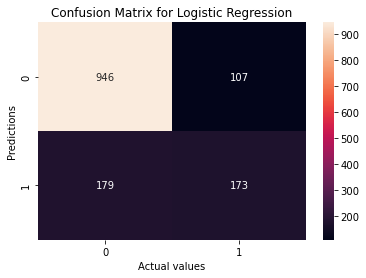

In [91]:
for classifier in classifiers:
    model_name = classifier[1]
    model = classifier[0]
    
    # Train the model
    model.fit(x_train_top_eight_scaled, y_train)
    
    # Make predictions
    predictions = model.predict(x_test_top_eight_scaled)
    
    # Print classification report and confusion matrix only for Logistic Regression
    if model_name == 'Logistic Regression':
        report = classification_report(y_test, predictions)
        print(f"<-- {model_name} -->")
        print("Classification Report:\n", report)
        
        # Compute and print confusion matrix
        matrix = confusion_matrix(y_test, predictions)
        print("Confusion Matrix:\n", matrix)
        
        # Plot confusion matrix
        sns.heatmap(matrix, annot=True, fmt='g')
        plt.xlabel("Actual values")
        plt.ylabel("Predictions")
        plt.title(f"Confusion Matrix for {model_name}")
        
         # Save the plot as a PDF
        plt.savefig('visualization10.pdf', format='pdf', bbox_inches='tight')
        
        # Show the plot
        plt.show()

In [ ]:
"""Reducing the features decreased false negatives by 3 predictions 
without affecting the true positives

Since our aim to minimize false negatives, we can proceed with using our 
top seven features only."""


### Fine-tune the model using parameters


In [92]:
from sklearn.model_selection import GridSearchCV

In [93]:
#Define parameter grid for tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Regularization type
    'solver': ['liblinear', 'saga'],  # Solvers that support l1 and elasticnet penalties
    'class_weight': [None, 'balanced']  # To handle class imbalance
}


In [94]:
# Initialize the logistic regression model
model = LogisticRegression(random_state=42, max_iter=1000)

In [95]:
# Initialize GridSearchCV to tune the model's hyperparameters
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='f1',  # Use F1-score as the metric to optimize
    cv=5, 
    verbose=1,
    n_jobs=-1  # Use all available cores
)

#Fit the grid search model
grid_search.fit(x_train_top_eight, y_train)

# Get the best model from grid search
best_model = grid_search.best_estimator_


Fitting 5 folds for each of 80 candidates, totalling 400 fits


/Users/chinuambajekwe/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/chinuambajekwe/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/chinuambajekwe/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/chinuambajekwe/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/chinuambajekwe/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/User

/Users/chinuambajekwe/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/chinuambajekwe/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/chinuambajekwe/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/chinuambajekwe/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/chinuambajekwe/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/User

/Users/chinuambajekwe/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/chinuambajekwe/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/chinuambajekwe/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/chinuambajekwe/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/chinuambajekwe/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/User

/Users/chinuambajekwe/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/chinuambajekwe/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/chinuambajekwe/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/chinuambajekwe/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/chinuambajekwe/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/User

/Users/chinuambajekwe/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/chinuambajekwe/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/chinuambajekwe/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/chinuambajekwe/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/chinuambajekwe/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/User

Best Parameters Found:  {'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.73      0.81      1053
           1       0.50      0.78      0.61       352

    accuracy                           0.75      1405
   macro avg       0.70      0.76      0.71      1405
weighted avg       0.81      0.75      0.76      1405



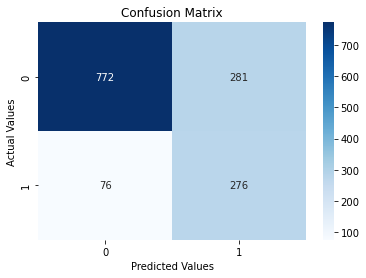

In [97]:
# Print the best parameters
print("Best Parameters Found: ", grid_search.best_params_)

# Predict on the test set with the best model
best_predictions = best_model.predict(x_test_top_eight)

# Generate classification report
report = classification_report(y_test, best_predictions)

# Generate confusion matrix
matrix = confusion_matrix(y_test, best_predictions)

# Display classification report
print("Classification Report:\n", report)

# Plot confusion matrix as a heatmap
sns.heatmap(matrix, annot=True, fmt='.6g', cmap='Blues')
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Confusion Matrix")

# Save the plot as a PDF
plt.savefig('visualization_11.pdf', format='pdf', bbox_inches='tight')

plt.show()

In [ ]:
"""
Using our best parameters, we achieved 276 true positive predictions, marking 
a significant 59.54% improvement over our base model, which is impressive. 

However, this also led to an increase in false negatives to 281, representing a 
155.45% rise.

As previously discussed, our primary objective is to minimize the number of 
false negatives, where customers predicted not to churn actually do churn.

Reducing false negatives should take precedence over increasing true positives 
because retaining existing customers is likely more cost-effective than acquiring new ones.

Therefore, I recommend that Connectel adopts the base model outlined below.

"""

<-- Logistic Regression -->
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1053
           1       0.62      0.49      0.55       352

    accuracy                           0.80      1405
   macro avg       0.73      0.69      0.71      1405
weighted avg       0.79      0.80      0.79      1405

Confusion Matrix:
 [[946 107]
 [179 173]]


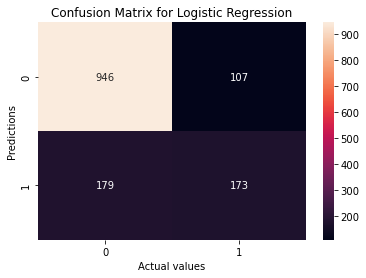

In [103]:
for classifier in classifiers:
    model_name = classifier[1]
    model = classifier[0]
    
    # Train the model
    model.fit(x_train_top_eight_scaled, y_train)
    
    # Make predictions
    predictions = model.predict(x_test_top_eight_scaled)
    
    # Print classification report and confusion matrix only for Logistic Regression
    if model_name == 'Logistic Regression':
        report = classification_report(y_test, predictions)
        print(f"<-- {model_name} -->")
        print("Classification Report:\n", report)
        
        # Compute and print confusion matrix
        matrix = confusion_matrix(y_test, predictions)
        print("Confusion Matrix:\n", matrix)
        
        # Plot confusion matrix
        sns.heatmap(matrix, annot=True, fmt='g')
        plt.xlabel("Actual values")
        plt.ylabel("Predictions")
        plt.title(f"Confusion Matrix for {model_name}")
        plt.show()

### Feature Coefficient Interpretation for Decision-making

In [104]:
#view the coefficients with their respective signs
feature_importance

,Feature,Importance
17,MonthlyCharges,3.663076
13,PaperlessBilling,0.293631
15,SeniorCitizen,0.289594
4,MultipleLines,0.248286
16,tenure,0.186906
14,PaymentMethod,0.120785
11,StreamingMovies,0.109886
5,InternetService,0.077899
1,Partner,0.066992
10,StreamingTV,0.050295


In [105]:
#These values are in log-odds, so we exponentiate the coefficients for easy interpretation

odds_ratios = np.exp(coefficients)

# Display the results in a readable format
for feature, odds_ratio in zip(feature_name, odds_ratios):
    print(f"{feature}: Odds Ratio = {odds_ratio:.2f}")

gender: Odds Ratio = 0.99
Partner: Odds Ratio = 1.07
Dependents: Odds Ratio = 0.81
PhoneService: Odds Ratio = 0.45
MultipleLines: Odds Ratio = 1.28
InternetService: Odds Ratio = 1.08
OnlineSecurity: Odds Ratio = 0.58
OnlineBackup: Odds Ratio = 0.75
DeviceProtection: Odds Ratio = 0.87
TechSupport: Odds Ratio = 0.57
StreamingTV: Odds Ratio = 1.05
StreamingMovies: Odds Ratio = 1.12
Contract: Odds Ratio = 0.22
PaperlessBilling: Odds Ratio = 1.34
PaymentMethod: Odds Ratio = 1.13
SeniorCitizen: Odds Ratio = 1.34
tenure: Odds Ratio = 1.21
MonthlyCharges: Odds Ratio = 38.98
TotalCharges: Odds Ratio = 0.03


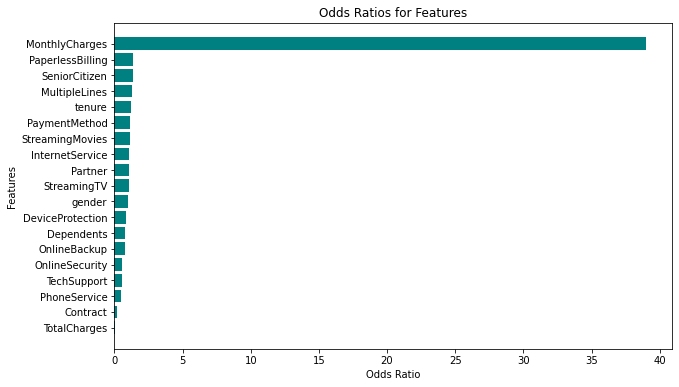

In [108]:
odds_ratios_dict = {feature: odds_ratio for feature, 
                    odds_ratio in zip(feature_name, odds_ratios)}

# Convert the dictionary to a list of tuples and sort it 
sorted_odds_ratios = sorted(odds_ratios_dict.items(), key=lambda x: x[1], reverse=True)

# Unpack the sorted list back into feature names and odds ratios
sorted_features, sorted_odds_ratios = zip(*sorted_odds_ratios)

# Plotting the odds ratios as a horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_odds_ratios, color='teal')
plt.xlabel('Odds Ratio')
plt.ylabel('Features')
plt.title('Odds Ratios for Features')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest odds ratio at the top

 # Save the plot as a PDF
plt.savefig('visualization12.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [ ]:
##Interpret some features using Odds Ratio
"""
Connectel's stakeholders should pay close attention to customer features with an odds 
ratio greater than 1, as they indicate a higher likelihood of customer churn.

Odds Ratios Greater than 1 (High Likelihood of Churn):

Monthly Charges: With an odds ratio of 38.98, an increase in monthly charges significantly 
raises the odds of a customer churning by this factor. This suggests that customers with 
higher monthly expenses may be more prone to churn.

Tenure: An odds ratio of 1.21 indicates that longer customer tenure increases the likelihood 
of churn by a factor of 1.21. This could imply that customers who've been with the company 
longer may be more likely to leave.

Paperless Billing: Customers who opt for paperless billing show a higher likelihood of 
churn, as highlighted in the bivariate analysis.

Senior Citizen: Senior citizens are more likely to churn, possibly due to their fixed 
income and reluctance to spend on telecom services.

Multiple Lines: The churn rate for customers with multiple lines is high. This may be 
linked to the increased monthly charges associated with multiple lines, which the odds 
ratio likely reflects.

Payment Method: Customers who use electronic payment methods have a higher churn rate, a 
trend that the odds ratio may be capturing.

Streaming Movies: Customers who stream movies are more likely to churn, possibly due to 
the higher data consumption and resulting increased monthly fees, which is likely reflected
in the odds ratio.

Internet Service: Customers with fiber optic internet plans also show a higher churn rate,
which the odds ratio seems to capture.

Odds Ratios Less than 1 (Low Likelihood of Churn):

Total Charges: With an odds ratio of 0.03, an increase in total charges significantly 
reduces the odds of a customer churning by this factor. This suggests that customers 
who have generated higher cumulative revenue are less likely to churn.


Other features like Gender, Online Security, Online Backup, Phone Service, Dependents, 
Device Protection, Tech Support, and Contract Type also have odds ratios below 1, 
indicating a lower probability of churn for customers with these characteristics.

It is worth investigating why higher total charges reduce the odds of churn, while 
higher monthly charges increase them.

My thought is:

* Higher Total Charges often reflect long-term customer engagement, satisfaction, and a 
higher perceived value of services, which contribute to reduced churn.
* Higher Monthly Charges, in contrast, can lead to increased churn as customers may 
perceive the regular cost as too high relative to the value they receive, making them 
more likely to explore other options.


"""